In [221]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix


In [2]:
#Load data

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
train_df = df_train.copy()
test_df = df_test.copy()

In [4]:
# First 5 rows of the data.
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
# Let's observe the types of variables and the counts of data.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
# Let's view the statistical information regarding the numeric columns.
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
# Let's see the shape of the Train data and Test data. 

print("Shape of TrainData: ",train_df.shape)
print("Shape of TestData: ",test_df.shape)

Shape of TrainData:  (100000, 28)
Shape of TestData:  (50000, 27)


In [8]:
# Missing values 

train_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

- We have 100,000 data points and 28 variables in our dataset.
- Some numerical columns have been provided as categorical, and they contain inappropriate characters.
- We have missing values in some columns, and we will either fill them with appropriate values or drop those columns.
- We will fill most of the missing values by grouping them based on the Customer_ID variable.
- Let's define the functions for these processes now.

In [9]:
# Funcitons 

# Outlier thresholds

def out_th(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Check outliers

def check_outlier(dataframe, col_name):
    low_limit, up_limit = out_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
# Remove outliers

def remove(dataframe, col_name,q1,q2):
    low_limit, up_limit = out_th(dataframe, col_name,q1,q2)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

# We are converting numerically represented variables that are given as objects into numerical variables and removing inappropriate characters within them.
def convert_object_to_numss(data, cols):
    for col in cols:
        if data[col].dtype == "object":
            try:
                data[col] = pd.to_numeric(data[col].str.replace("_", "").str.replace("-", "").str.replace("__", ""), errors="coerce")
            except ValueError:
                pass  
    return data

# We will fill most of our variables by grouping them based on the Customer_ID variable and filling with the mode value.
def fill_with_mode(data,col,q1,q2) : 
    data[col] = data.groupby("Customer_ID")[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.isnull().all() and not x.mode().empty else x)
    
    if data[col].isnull().sum().any() == True : 
        data = remove(data,col,q1,q2)
        
    
# Check column 

def check_column(data,col,q1,q2) : 
    print("There's {} null values ".format(data[col].isnull().sum()))
    print("//////////////")
    low,up = out_th(data,col,q1,q2)
    count_large_values = len(data[data[col] > up])
    print("Number of values greater than {} in {}: {}".format(up,col,count_large_values))
    print("//////////////")
    print("Dtype of column: ",data[col].dtype)
    print("//////////////")
    print("Number of unique values: ",data[col].nunique())
    print("//////////////")
    print("Shape of column: ",data[col].shape)

In [10]:
object_cols = ["Age","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit","Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]

In [11]:
convert_object_to_numss(train_df,object_cols)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [12]:
convert_object_to_numss(test_df,object_cols)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.70,34.780553,NaN,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


## Age

In [13]:
check_column(train_df,"Age",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 67.5 in Age: 2781
//////////////
Dtype of column:  int64
//////////////
Number of unique values:  1728
//////////////
Shape of column:  (100000,)


In [14]:
train_df['Age'] = train_df['Age'].apply(lambda x: x if 0 <= x <= 67.5 else np.nan)
test_df['Age'] = test_df['Age'].apply(lambda x: x if 0 <= x <= 67.5 else np.nan)

In [15]:
fill_with_mode(train_df,"Age",0.25,0.75)

In [16]:
check_column(train_df,"Age",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 69.0 in Age: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  43
//////////////
Shape of column:  (100000,)


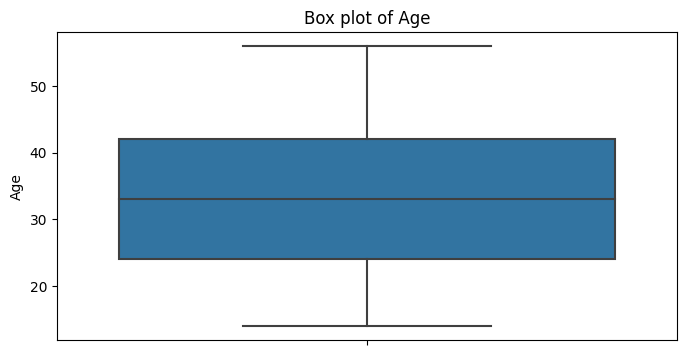

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(y=train_df["Age"])
plt.title("Box plot of Age")
plt.show()

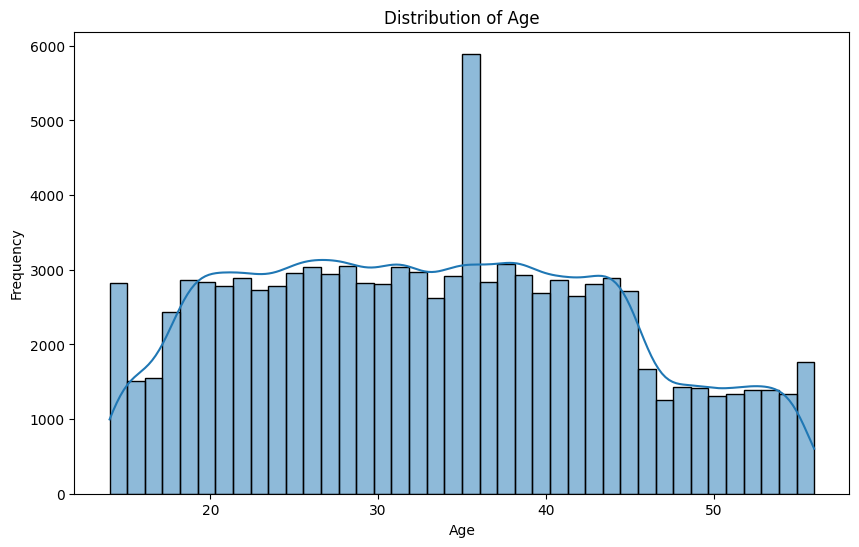

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'], bins=40, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Occupation 

In [19]:
# We are replacing garbage values with NaN and then filling them again.

train_df['Occupation'] = train_df['Occupation'].replace("_______", np.nan)
test_df["Occupation"] = test_df["Occupation"].replace("_______", np.nan)

In [20]:
fill_with_mode(train_df,"Occupation",0,1)

In [21]:
fill_with_mode(test_df,"Occupation",0,1)

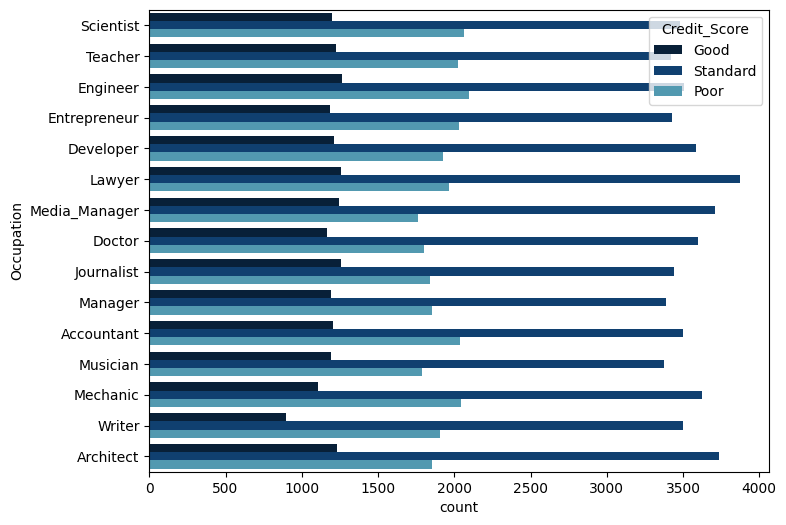

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(y = train_df["Occupation"],hue=train_df["Credit_Score"],palette="ocean")
plt.show()

## Annual Income 

In [23]:
check_column(train_df,"Annual_Income",0.20,0.80)

There's 0 null values 
//////////////
Number of values greater than 179371.8900000002 in Annual_Income: 1023
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  13487
//////////////
Shape of column:  (100000,)


In [24]:
train_df = remove(train_df,"Annual_Income",0.20,0.80)

In [25]:
train_df.shape

(98977, 28)

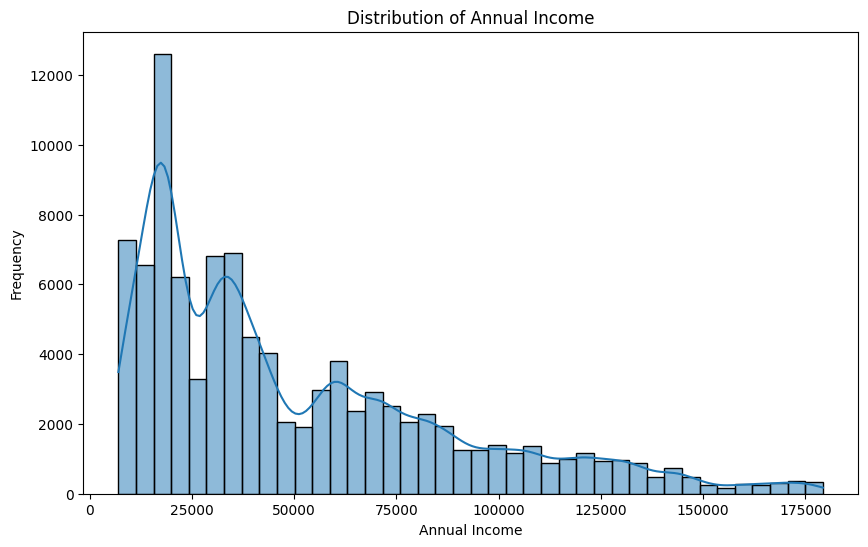

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x="Annual_Income", bins=40, edgecolor='black',kde=True)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()

## Monthly Inhand Salary

In [27]:
check_column(train_df,"Monthly_Inhand_Salary",0.2,0.8)

There's 14853 null values 
//////////////
Number of values greater than 14566.678124999995 in Monthly_Inhand_Salary: 303
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  13230
//////////////
Shape of column:  (98977,)


In [28]:
fill_with_mode(train_df,"Monthly_Inhand_Salary",0.2,0.8)

In [29]:
check_column(train_df,"Monthly_Inhand_Salary",0.2,0.8)

There's 0 null values 
//////////////
Number of values greater than 14568.7625 in Monthly_Inhand_Salary: 363
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  13230
//////////////
Shape of column:  (98977,)


In [30]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.2,0.8)

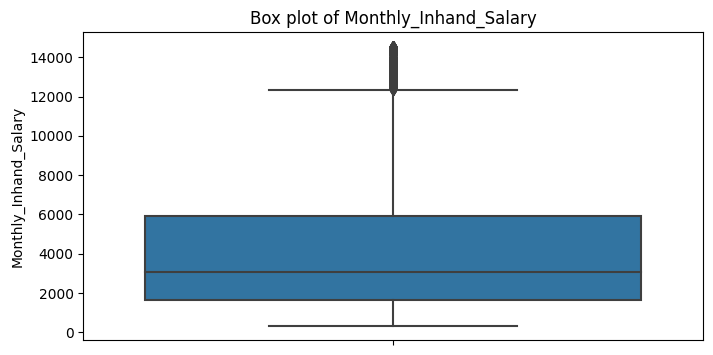

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(y=train_df["Monthly_Inhand_Salary"])
plt.title("Box plot of Monthly_Inhand_Salary")
plt.show()

In [32]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 12356.64990540702 in Monthly_Inhand_Salary: 1746
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  13182
//////////////
Shape of column:  (98614,)


In [33]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.25,0.75)

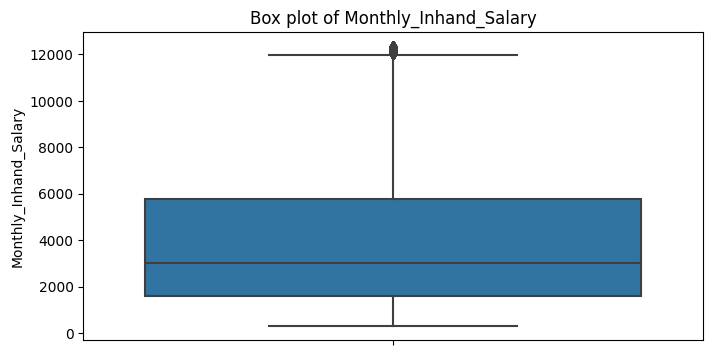

In [34]:
plt.figure(figsize=(8,4))
sns.boxplot(y=train_df["Monthly_Inhand_Salary"])
plt.title("Box plot of Monthly_Inhand_Salary")
plt.show()

In [35]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11997.88375 in Monthly_Inhand_Salary: 545
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12952
//////////////
Shape of column:  (96868,)


In [36]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.25,0.75)

In [37]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11852.95625 in Monthly_Inhand_Salary: 247
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12880
//////////////
Shape of column:  (96323,)


In [38]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.25,0.75)

In [39]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11789.304397403113 in Monthly_Inhand_Salary: 57
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12849
//////////////
Shape of column:  (96076,)


In [40]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.25,0.75)

In [41]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11775.181666666667 in Monthly_Inhand_Salary: 32
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12840
//////////////
Shape of column:  (96019,)


In [42]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.25,0.75)

In [43]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11766.218125000001 in Monthly_Inhand_Salary: 16
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12836
//////////////
Shape of column:  (95987,)


In [44]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.25,0.75)

In [45]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11756.5475 in Monthly_Inhand_Salary: 8
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12834
//////////////
Shape of column:  (95971,)


In [46]:
train_df = remove(train_df,"Monthly_Inhand_Salary",0.25,0.75)

In [47]:
check_column(train_df,"Monthly_Inhand_Salary",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11756.5475 in Monthly_Inhand_Salary: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12833
//////////////
Shape of column:  (95963,)


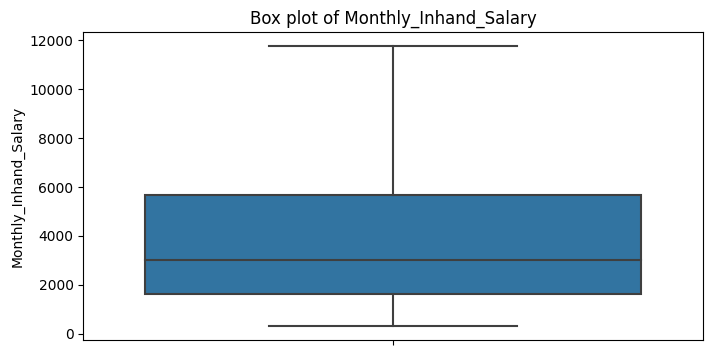

In [48]:
plt.figure(figsize=(8,4))
sns.boxplot(y=train_df["Monthly_Inhand_Salary"])
plt.title("Box plot of Monthly_Inhand_Salary")
plt.show()

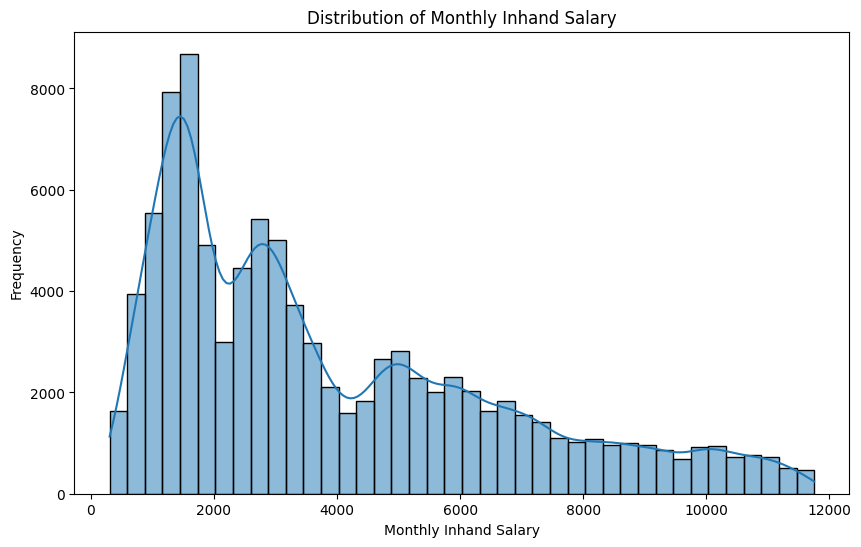

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Monthly_Inhand_Salary'], bins=40, kde=True)
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')
plt.show()

In [50]:
train_df.shape

(95963, 28)

## Num Bank Accounts

In [51]:
check_column(train_df,"Num_Bank_Accounts",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 14.0 in Num_Bank_Accounts: 1264
//////////////
Dtype of column:  int64
//////////////
Number of unique values:  919
//////////////
Shape of column:  (95963,)


In [52]:
train_df['Num_Bank_Accounts'] = train_df['Num_Bank_Accounts'].apply(lambda x: x if 0 <= x <= 14 else np.nan)

In [53]:
fill_with_mode(train_df,"Num_Bank_Accounts",0.25,0.75)

In [54]:
check_column(train_df,"Num_Bank_Accounts",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11.5 in Num_Bank_Accounts: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12
//////////////
Shape of column:  (95963,)


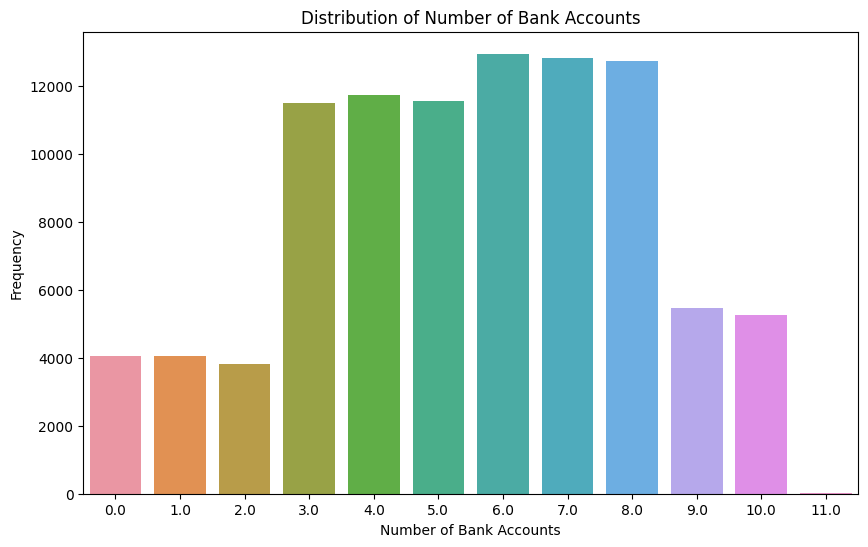

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x = train_df['Num_Bank_Accounts'])
plt.title('Distribution of Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Frequency')
plt.show()

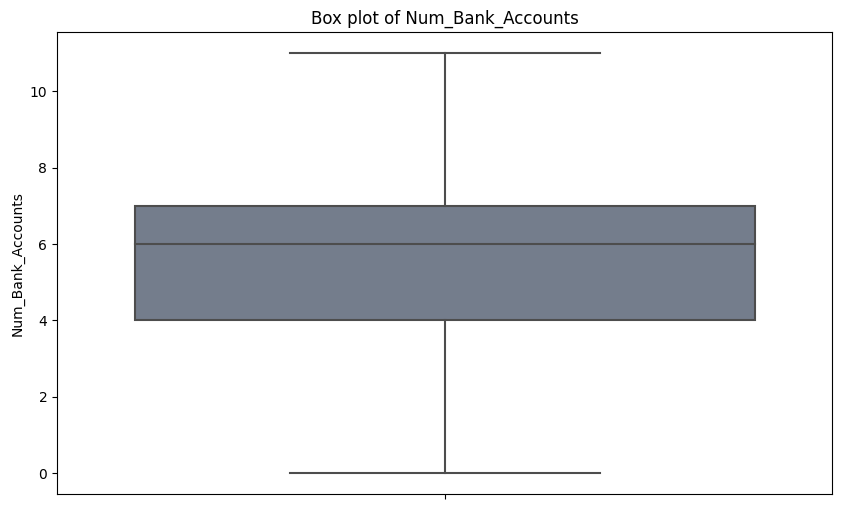

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = train_df['Num_Bank_Accounts'],palette="bone")
plt.title("Box plot of Num_Bank_Accounts")
plt.show()

## Num Credit Card

In [57]:
check_column(train_df,"Num_Credit_Card",0.2,0.8)

There's 0 null values 
//////////////
Number of values greater than 11.5 in Num_Credit_Card: 2178
//////////////
Dtype of column:  int64
//////////////
Number of unique values:  1156
//////////////
Shape of column:  (95963,)


In [58]:
train_df['Num_Credit_Card'] = train_df['Num_Credit_Card'].apply(lambda x: x if 0 <= x <= 11.5 else np.nan)

In [59]:
fill_with_mode(train_df,"Num_Credit_Card",0.25,0.75)

In [60]:
check_column(train_df,"Num_Credit_Card",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 11.5 in Num_Credit_Card: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  12
//////////////
Shape of column:  (95963,)


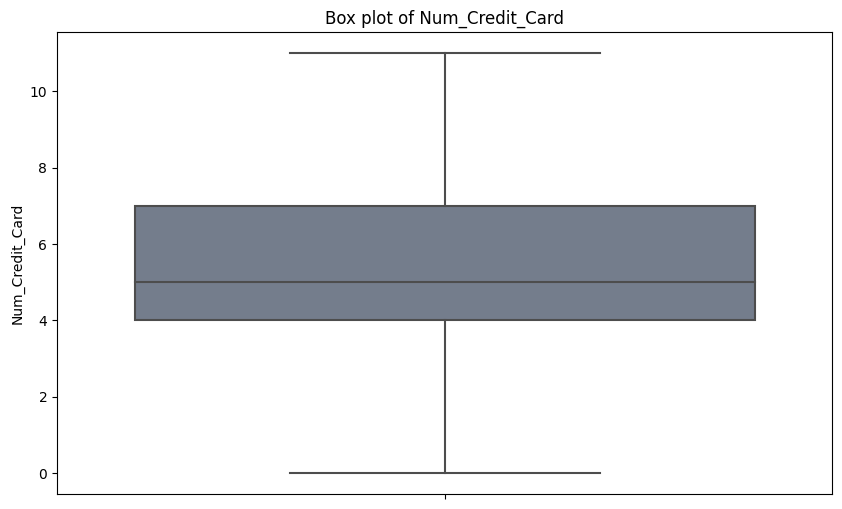

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = train_df['Num_Credit_Card'],palette="bone")
plt.title("Box plot of Num_Credit_Card")
plt.show()

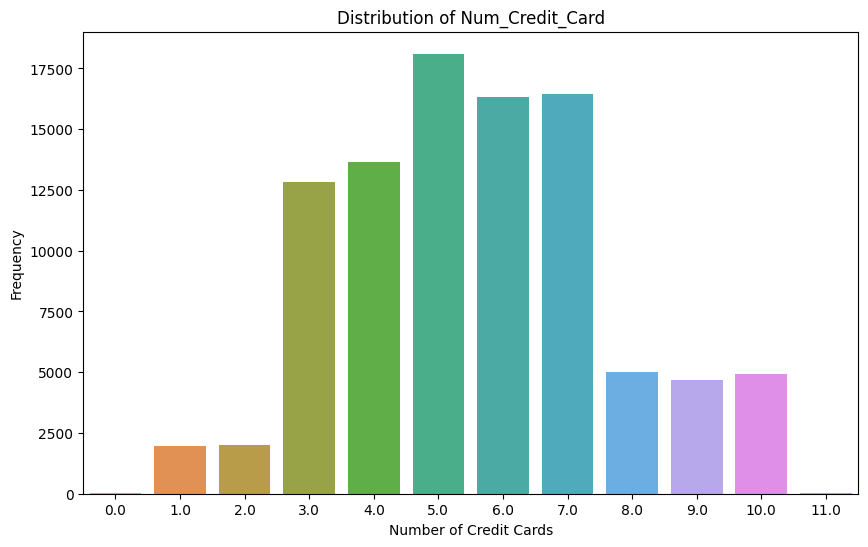

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train_df['Num_Credit_Card'])
plt.title('Distribution of Num_Credit_Card')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')
plt.show()

In [63]:
check_outlier(train_df,"Num_Credit_Card")

False

## Interest Rate

In [64]:
check_column(train_df,"Interest_Rate",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 40.5 in Interest_Rate: 1965
//////////////
Dtype of column:  int64
//////////////
Number of unique values:  1708
//////////////
Shape of column:  (95963,)


In [65]:
train_df['Interest_Rate'] = train_df['Interest_Rate'].apply(lambda x: x if 0 <= x <= 40.5 else np.nan)

In [66]:
fill_with_mode(train_df,"Interest_Rate",0.25,0.75)

In [67]:
check_column(train_df,"Interest_Rate",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 38.0 in Interest_Rate: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  34
//////////////
Shape of column:  (95963,)


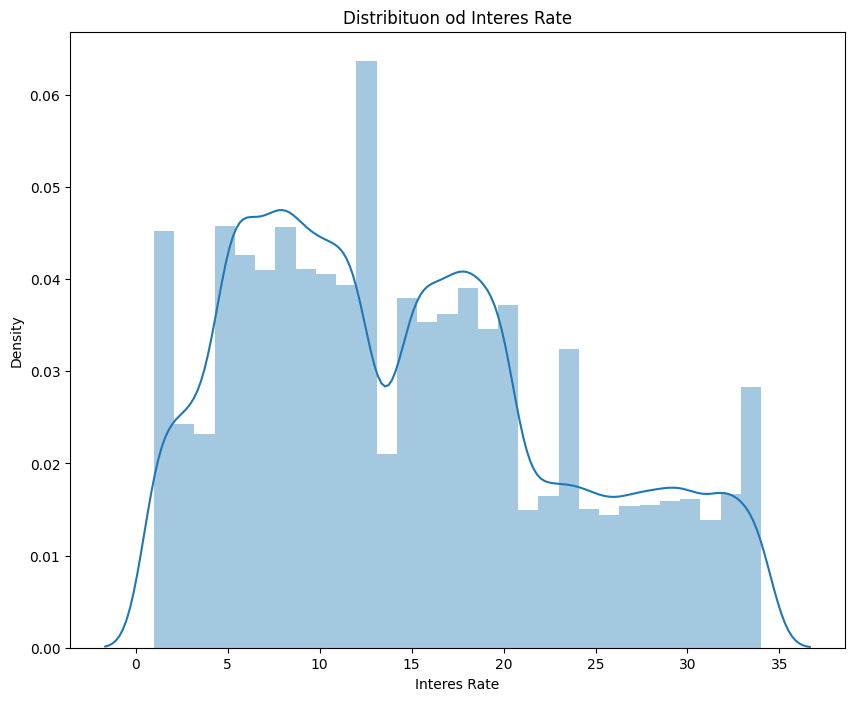

In [68]:
plt.figure(figsize=(10,8))
sns.distplot(x = train_df["Interest_Rate"],bins=30,kde=True)
plt.title("Distribituon od Interes Rate")
plt.xlabel("Interes Rate")
plt.show()

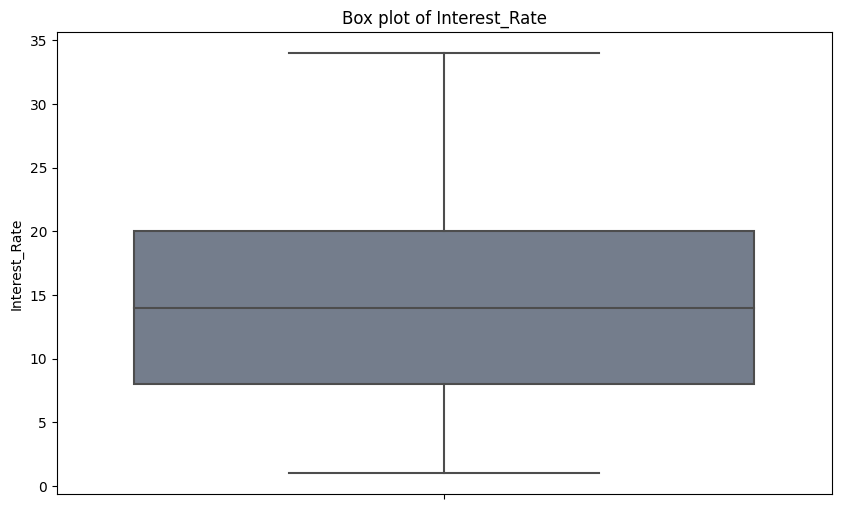

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = train_df['Interest_Rate'],palette="bone")
plt.title("Box plot of Interest_Rate")
plt.show()

## Num of Loan

In [70]:
check_column(train_df,"Num_of_Loan",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 12.0 in Num_of_Loan: 4181
//////////////
Dtype of column:  int64
//////////////
Number of unique values:  397
//////////////
Shape of column:  (95963,)


In [71]:
train_df["Num_of_Loan"] = train_df["Num_of_Loan"].apply(lambda x : x if 0 <= x <= 12.0 else np.nan)

In [72]:
fill_with_mode(train_df,"Num_of_Loan",0.25,0.75)

In [73]:
check_column(train_df,"Num_of_Loan",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 9.5 in Num_of_Loan: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  10
//////////////
Shape of column:  (95963,)


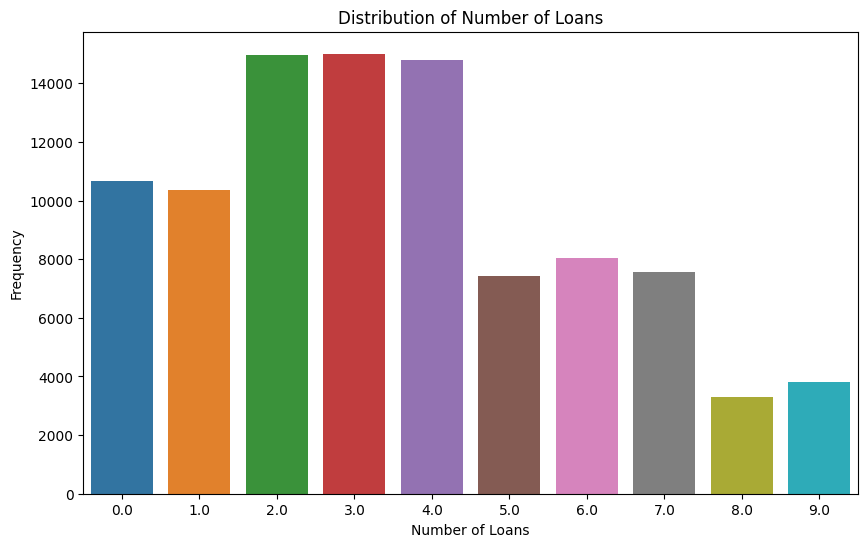

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train_df['Num_of_Loan'])
plt.title('Distribution of Number of Loans')
plt.xlabel('Number of Loans')
plt.ylabel('Frequency')
plt.show()

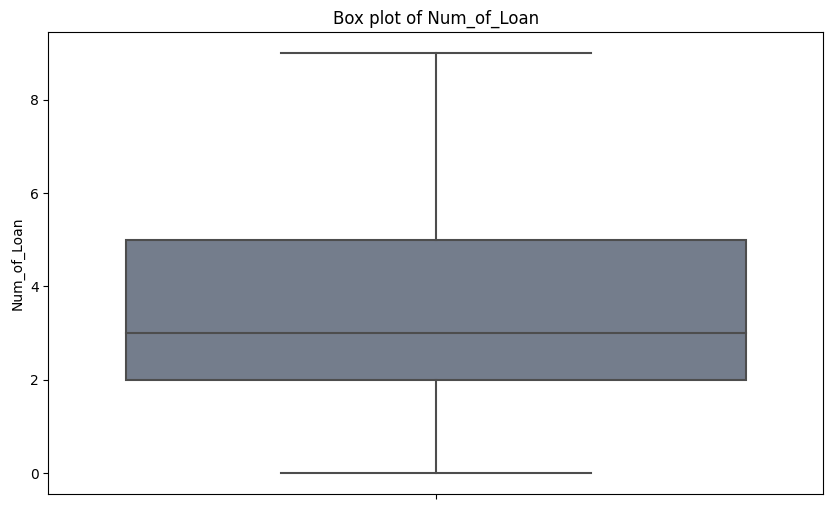

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = train_df['Num_of_Loan'],palette="bone")
plt.title("Box plot of Num_of_Loan")
plt.show()

## Delay From Due Date

In [76]:
check_column(train_df,"Delay_from_due_date",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 55.0 in Delay_from_due_date: 3958
//////////////
Dtype of column:  int64
//////////////
Number of unique values:  73
//////////////
Shape of column:  (95963,)


In [77]:
train_df["Delay_from_due_date"] = train_df["Delay_from_due_date"].apply(
    lambda x: np.nan if x < 0 else x
)

In [78]:
fill_with_mode(train_df,"Delay_from_due_date",0.25,0.75)

In [79]:
check_column(train_df,"Delay_from_due_date",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 55.0 in Delay_from_due_date: 3958
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  68
//////////////
Shape of column:  (95963,)


In [80]:
train_df  = remove(train_df,"Delay_from_due_date",0.25,0.75)

In [81]:
check_column(train_df,"Delay_from_due_date",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 52.5 in Delay_from_due_date: 1756
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  56
//////////////
Shape of column:  (92005,)


In [82]:
train_df  = remove(train_df,"Delay_from_due_date",0.25,0.75)

In [83]:
check_column(train_df,"Delay_from_due_date",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 52.5 in Delay_from_due_date: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  53
//////////////
Shape of column:  (90249,)


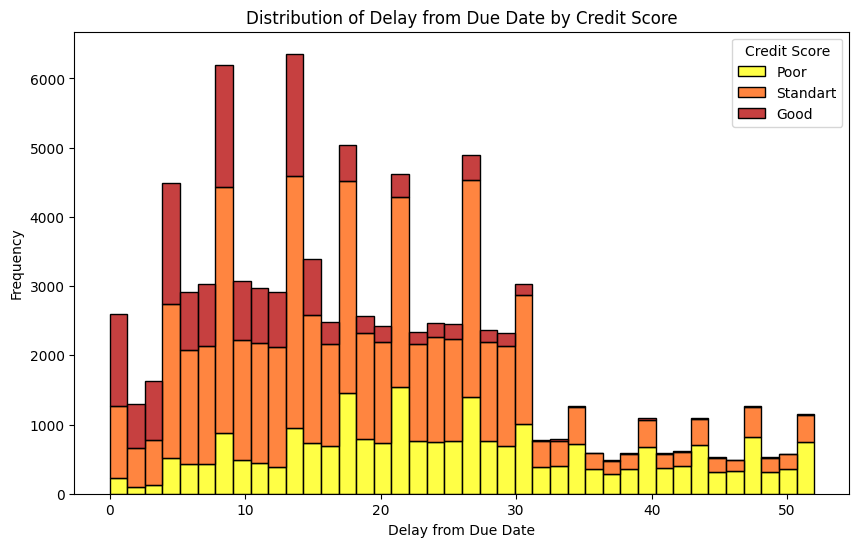

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Delay_from_due_date', hue='Credit_Score', bins=40, multiple='stack',palette="hot")
plt.title('Distribution of Delay from Due Date by Credit Score')
plt.xlabel('Delay from Due Date')
plt.ylabel('Frequency')
plt.legend(title='Credit Score', labels=['Poor', 'Standart', 'Good'])
plt.show()

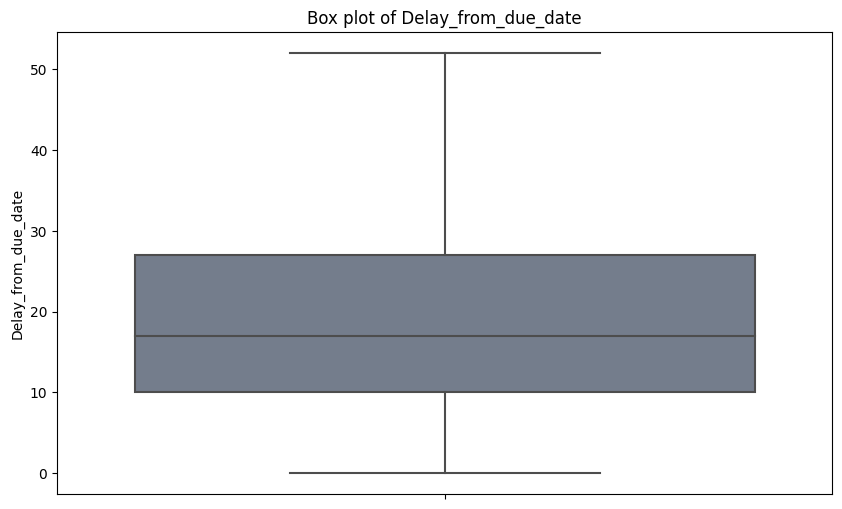

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = train_df['Delay_from_due_date'],palette="bone")
plt.title("Box plot of Delay_from_due_date")
plt.show()

## Num of Delayed Payment

In [86]:
check_column(train_df,"Num_of_Delayed_Payment",0.25,0.75)

There's 6328 null values 
//////////////
Number of values greater than 31.5 in Num_of_Delayed_Payment: 666
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  645
//////////////
Shape of column:  (90249,)


In [87]:
train_df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
10.0      5018
17.0      4909
19.0      4888
16.0      4782
12.0      4751
          ... 
2587.0       1
3489.0       1
749.0        1
2616.0       1
2047.0       1
Name: count, Length: 645, dtype: int64

In [88]:
train_df["Num_of_Delayed_Payment"] = train_df["Num_of_Delayed_Payment"].apply(lambda x : x if (0 <= x <= 30) else np.nan)

In [89]:
train_df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
10.0    5018
17.0    4909
19.0    4888
16.0    4782
12.0    4751
15.0    4740
9.0     4691
18.0    4630
8.0     4588
11.0    4558
20.0    4531
14.0    3959
13.0    3805
7.0     2155
6.0     2083
21.0    2068
22.0    1940
5.0     1896
2.0     1821
3.0     1813
1.0     1733
23.0    1653
4.0     1642
0.0     1445
24.0    1322
25.0    1293
26.0     251
27.0     184
28.0     106
Name: count, dtype: int64

In [90]:
check_column(train_df,"Num_of_Delayed_Payment",0.25,0.75)

There's 6994 null values 
//////////////
Number of values greater than 31.5 in Num_of_Delayed_Payment: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  29
//////////////
Shape of column:  (90249,)


In [91]:
train_df["Num_of_Delayed_Payment"] = train_df["Num_of_Delayed_Payment"].fillna(train_df["Num_of_Delayed_Payment"].mode().iloc[0])

In [92]:
check_column(train_df,"Num_of_Delayed_Payment",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 31.5 in Num_of_Delayed_Payment: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  29
//////////////
Shape of column:  (90249,)


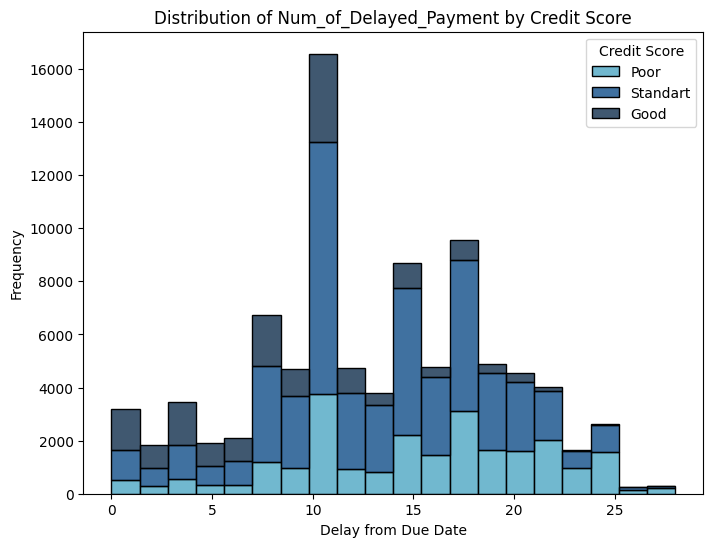

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Num_of_Delayed_Payment', hue='Credit_Score', bins=20, multiple='stack',palette="ocean")
plt.title('Distribution of Num_of_Delayed_Payment by Credit Score')
plt.xlabel('Delay from Due Date')
plt.ylabel('Frequency')
plt.legend(title='Credit Score', labels=['Poor', 'Standart', 'Good'])
plt.show()

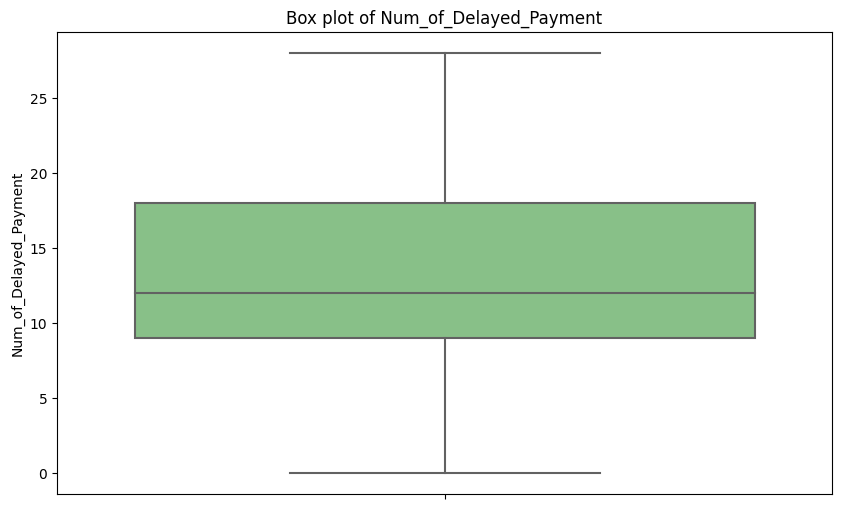

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = train_df['Num_of_Delayed_Payment'],palette="Accent")
plt.title("Box plot of Num_of_Delayed_Payment")
plt.show()

Changed Credit Limit

In [95]:
check_column(train_df,"Changed_Credit_Limit",0.25,0.75)

There's 1884 null values 
//////////////
Number of values greater than 28.5 in Changed_Credit_Limit: 991
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  3689
//////////////
Shape of column:  (90249,)


In [96]:
fill_with_mode(train_df,"Changed_Credit_Limit",0.25,0.75)

In [97]:
check_column(train_df,"Changed_Credit_Limit",0.2,0.8)

There's 0 null values 
//////////////
Number of values greater than 33.699999999999996 in Changed_Credit_Limit: 45
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  3689
//////////////
Shape of column:  (90249,)


In [98]:
train_df = remove(train_df,"Changed_Credit_Limit",0.2,0.8)

In [99]:
check_column(train_df,"Changed_Credit_Limit",0.2,0.8)

There's 0 null values 
//////////////
Number of values greater than 33.675000000000004 in Changed_Credit_Limit: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  3650
//////////////
Shape of column:  (90204,)


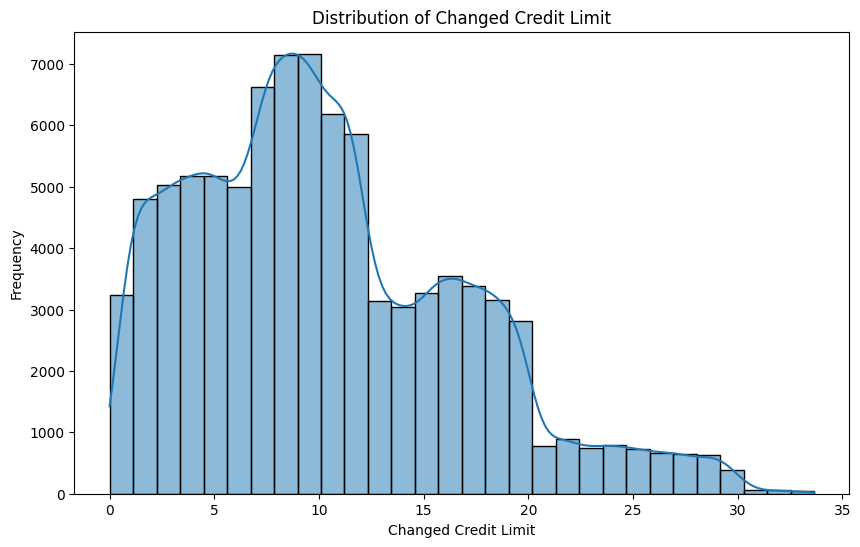

In [100]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Changed_Credit_Limit'], bins=30, kde=True)
plt.title('Distribution of Changed Credit Limit')
plt.xlabel('Changed Credit Limit')
plt.ylabel('Frequency')
plt.show()

Num of Credit Inquiries

In [101]:
check_column(train_df,"Num_Credit_Inquiries",0.2,0.8)

There's 1772 null values 
//////////////
Number of values greater than 19.5 in Num_Credit_Inquiries: 1495
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  1154
//////////////
Shape of column:  (90204,)


In [102]:
fill_with_mode(train_df,"Num_Credit_Inquiries",0.2,0.8)

In [103]:
check_column(train_df,"Num_Credit_Inquiries",0.2,0.8)

There's 3 null values 
//////////////
Number of values greater than 19.5 in Num_Credit_Inquiries: 1495
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  1154
//////////////
Shape of column:  (90204,)


In [104]:
train_df["Num_Credit_Inquiries"].fillna(train_df["Num_Credit_Inquiries"].mean(), inplace=True)

In [105]:
train_df = remove(train_df,"Num_Credit_Inquiries",0.2,0.8)

In [106]:
check_column(train_df,"Num_Credit_Inquiries",0.2,0.8)

There's 0 null values 
//////////////
Number of values greater than 19.5 in Num_Credit_Inquiries: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  18
//////////////
Shape of column:  (88706,)


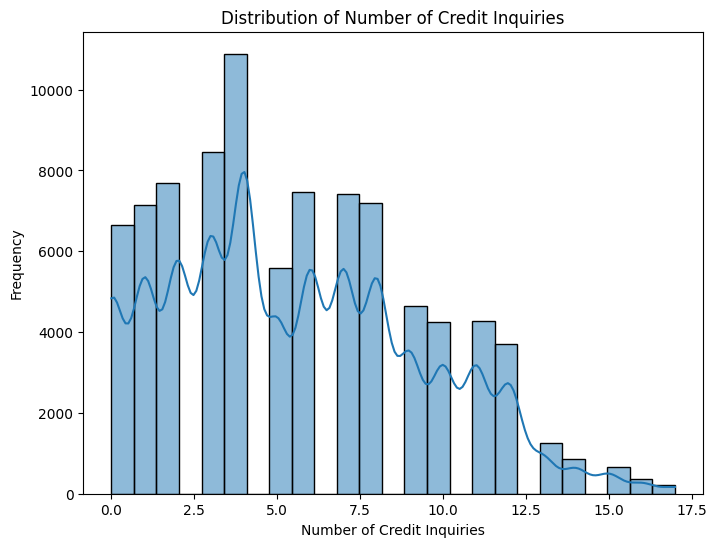

In [107]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Num_Credit_Inquiries'], bins=25, kde=True)
plt.title('Distribution of Number of Credit Inquiries')
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Frequency')
plt.show()

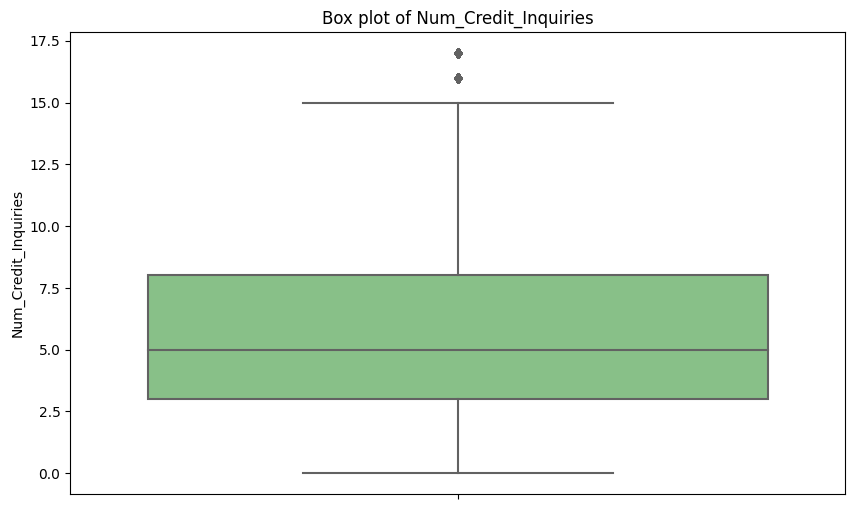

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = train_df['Num_Credit_Inquiries'],palette="Accent")
plt.title("Box plot of Num_Credit_Inquiries")
plt.show()

Credit Mix

In [109]:
train_df["Credit_Mix"] = train_df["Credit_Mix"].replace("_", np.nan)

In [110]:
train_df["Credit_Mix"].fillna(train_df["Credit_Mix"].mode(), inplace=True)

In [111]:
train_df["Credit_Mix"] = train_df["Credit_Mix"].fillna(method="ffill")

In [112]:
train_df["Credit_Mix"].isnull().sum()

0

In [113]:
train_df.shape

(88706, 28)

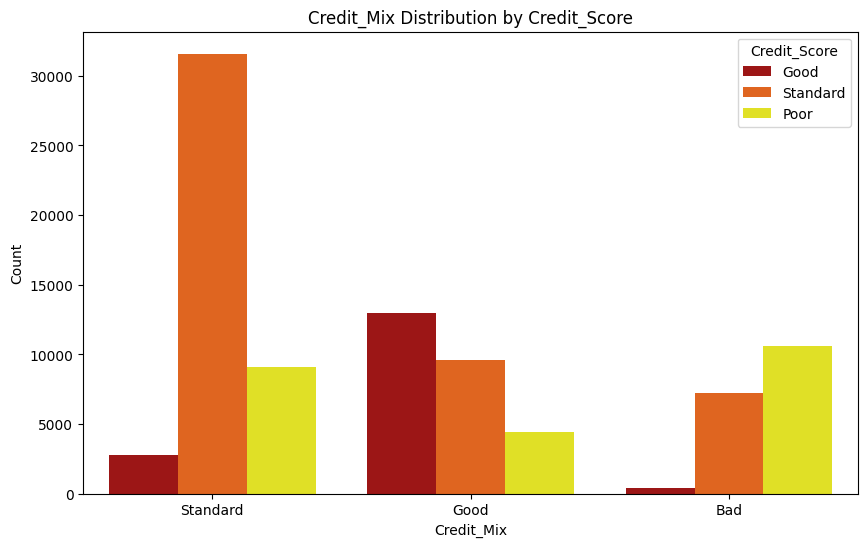

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x="Credit_Mix", hue="Credit_Score", palette="hot")
plt.xlabel("Credit_Mix")
plt.ylabel("Count")
plt.title("Credit_Mix Distribution by Credit_Score")
plt.legend(title="Credit_Score", loc="upper right")
plt.show()

Outsanding Debt

In [115]:
check_column(train_df,"Outstanding_Debt",0.2,0.8)

There's 0 null values 
//////////////
Number of values greater than 4652.765 in Outstanding_Debt: 1531
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  11312
//////////////
Shape of column:  (88706,)


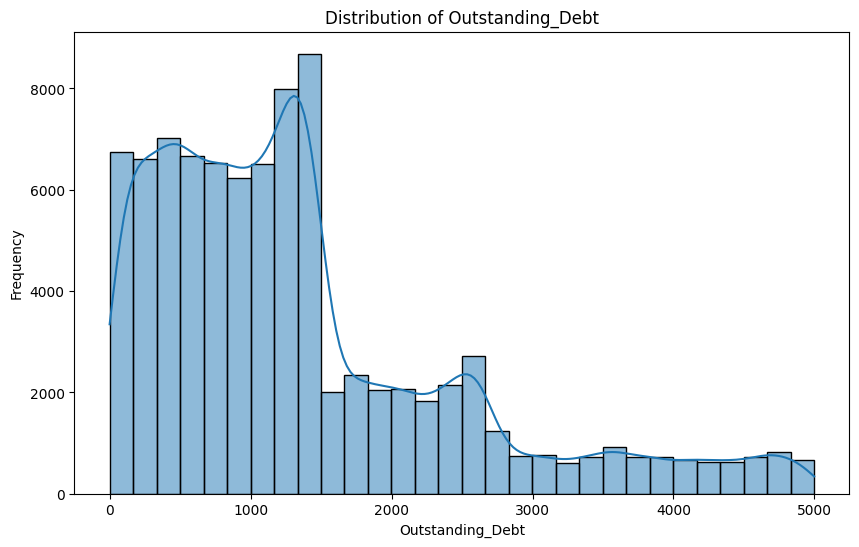

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x="Outstanding_Debt", bins=30, kde=True)
plt.xlabel("Outstanding_Debt")
plt.ylabel("Frequency")
plt.title("Distribution of Outstanding_Debt")
plt.show()

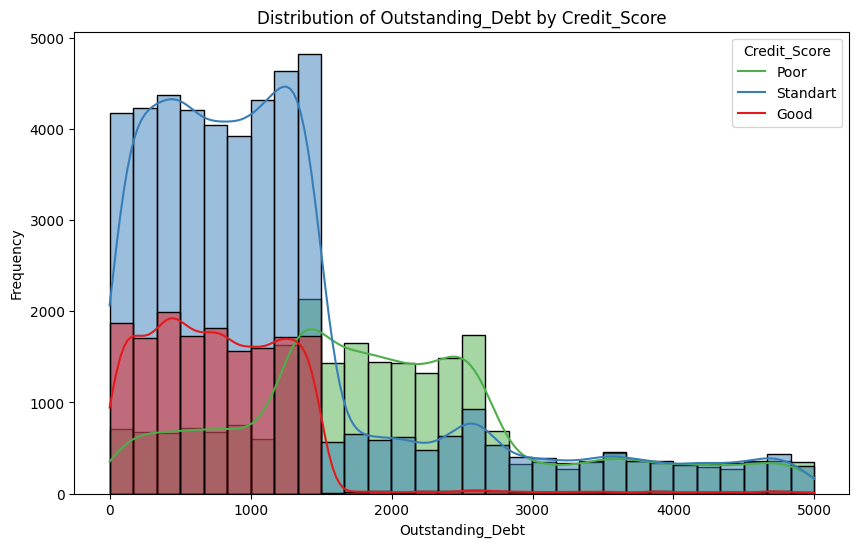

In [117]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x="Outstanding_Debt", bins=30, kde=True, hue="Credit_Score", palette="Set1")
plt.xlabel("Outstanding_Debt")
plt.ylabel("Frequency")
plt.title("Distribution of Outstanding_Debt by Credit_Score")
plt.legend(title="Credit_Score",labels=['Poor', 'Standart', 'Good'])
plt.show()

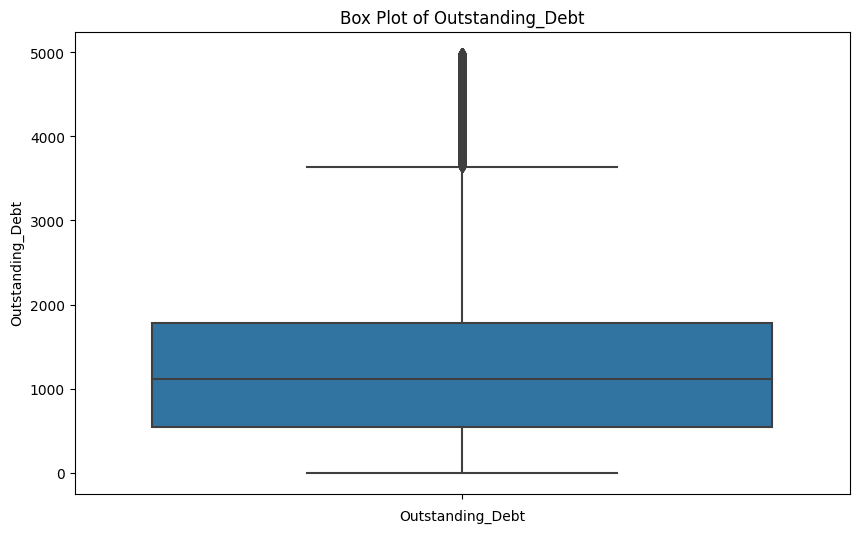

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, y="Outstanding_Debt")
plt.xlabel("Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

In [119]:
train_df = remove(train_df,"Outstanding_Debt",0.2,0.8)

In [120]:
check_column(train_df,"Outstanding_Debt",0.2,0.8)

There's 0 null values 
//////////////
Number of values greater than 4422.8 in Outstanding_Debt: 924
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  11102
//////////////
Shape of column:  (87175,)


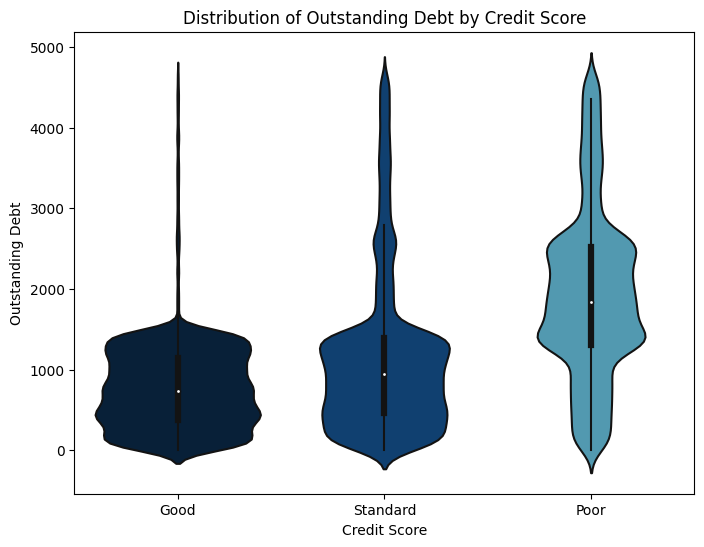

In [121]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=train_df, x="Credit_Score", y="Outstanding_Debt",palette="ocean")
plt.title("Distribution of Outstanding Debt by Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Outstanding Debt")
plt.show()

Credit Utilizitaion Ratio

In [122]:
check_column(train_df,"Credit_Utilization_Ratio",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 49.074569108371534 in Credit_Utilization_Ratio: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  87175
//////////////
Shape of column:  (87175,)


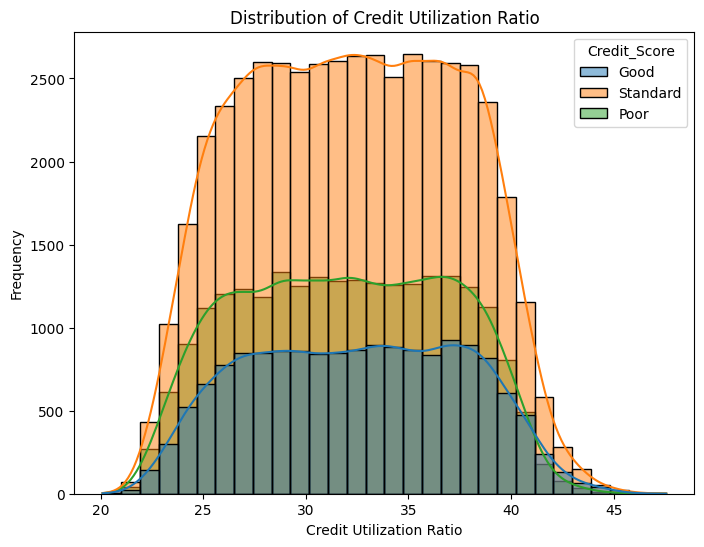

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="Credit_Utilization_Ratio", bins=30, kde=True,hue="Credit_Score")
plt.title("Distribution of Credit Utilization Ratio")
plt.xlabel("Credit Utilization Ratio")
plt.ylabel("Frequency")
plt.show()

Credit History Age

In [124]:
def convert_months(age) : 
     if pd.isnull(age) :
          return 0
     parts = str(age).split(" ")
     years = int(parts[0])
     months = int(parts[3])
     total_months = years * 12 + months
     return total_months

In [125]:
train_df["Credit_History_Age"] = train_df["Credit_History_Age"].apply(convert_months)

In [126]:
train_df["Credit_History_Age"] = train_df["Credit_History_Age"].replace(0, np.nan)

In [127]:
train_df["Credit_History_Age"] = train_df["Credit_History_Age"].fillna(method="ffill")

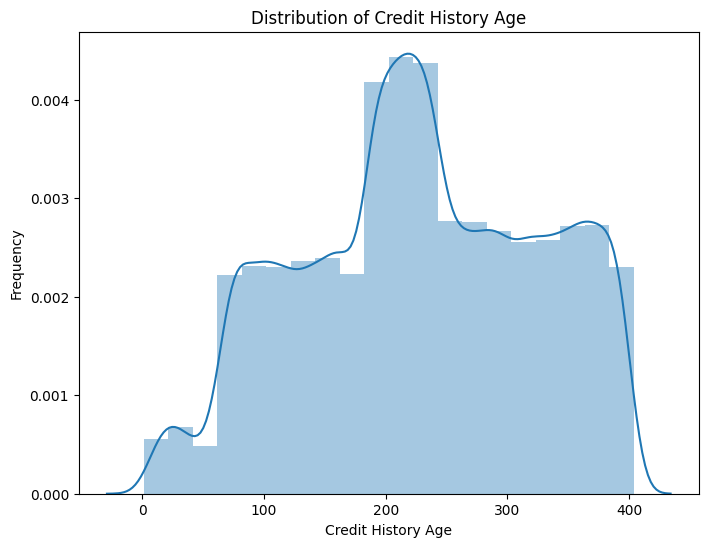

In [128]:
plt.figure(figsize=(8,6))
sns.distplot(train_df["Credit_History_Age"], bins=20,kde=True)
plt.xlabel("Credit History Age")
plt.ylabel("Frequency")
plt.title("Distribution of Credit History Age")
plt.show()

In [129]:
check_column(train_df,"Credit_History_Age",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 537.5 in Credit_History_Age: 0
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  404
//////////////
Shape of column:  (87175,)


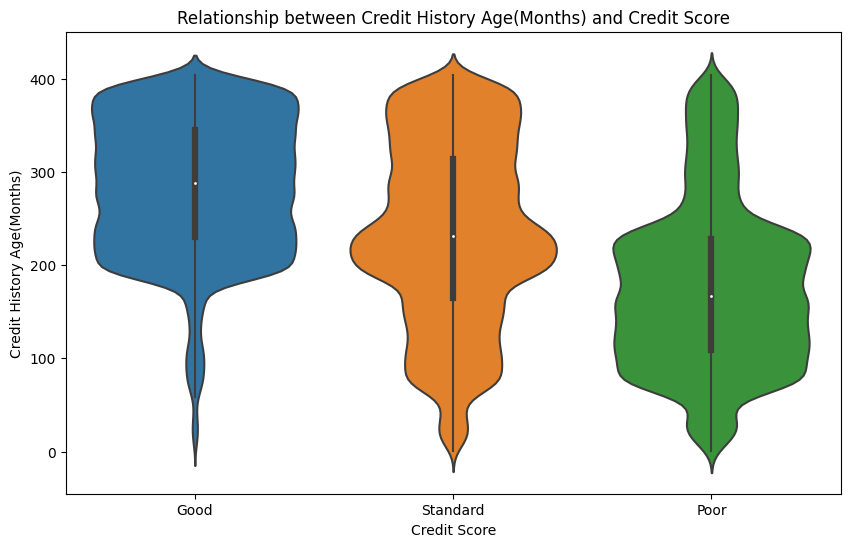

In [130]:
plt.figure(figsize=(10,6))
sns.violinplot(data=train_df, x="Credit_Score", y="Credit_History_Age", order=["Good", "Standard", "Poor"])
plt.xlabel("Credit Score")
plt.ylabel("Credit History Age(Months)")
plt.title("Relationship between Credit History Age(Months) and Credit Score")
plt.show()

Payment_of_Min_Amount

In [131]:
train_df["Payment_of_Min_Amount"] = train_df["Payment_of_Min_Amount"].replace("NM",np.nan)

In [132]:
train_df["Payment_of_Min_Amount"] = train_df.groupby("Customer_ID")["Payment_of_Min_Amount"].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.isnull().all() and not x.mode().empty else x
)

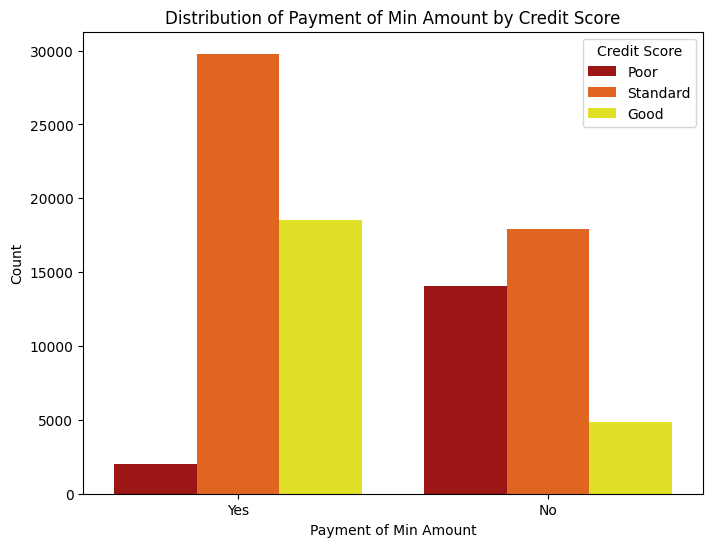

In [133]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x="Payment_of_Min_Amount", hue="Credit_Score", order=["Yes", "No"],palette="hot")
plt.xlabel("Payment of Min Amount")
plt.ylabel("Count")
plt.title("Distribution of Payment of Min Amount by Credit Score")
plt.legend(title="Credit Score", labels=["Poor", "Standard", "Good"])
plt.show()

Total EMI per Month

In [134]:
check_column(train_df,"Total_EMI_per_month",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 333.479175902708 in Total_EMI_per_month: 6067
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  13453
//////////////
Shape of column:  (87175,)


In [135]:
train_df["Total_EMI_per_month"] = train_df["Total_EMI_per_month"].apply(lambda x : x if (0 <= x <= 1000) else np.nan)

In [136]:
train_df["Total_EMI_per_month"] = train_df.groupby("Customer_ID")["Total_EMI_per_month"].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.isnull().all() and not x.mode().empty else x
)

In [137]:
check_column(train_df,"Total_EMI_per_month",0.25,0.75)

There's 38 null values 
//////////////
Number of values greater than 300.4044143509926 in Total_EMI_per_month: 4334
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  10656
//////////////
Shape of column:  (87175,)


In [138]:
train_df.dropna(subset=["Total_EMI_per_month"], inplace=True)

In [139]:
check_column(train_df,"Total_EMI_per_month",0.25,0.75)

There's 0 null values 
//////////////
Number of values greater than 300.4044143509926 in Total_EMI_per_month: 4334
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  10656
//////////////
Shape of column:  (87137,)


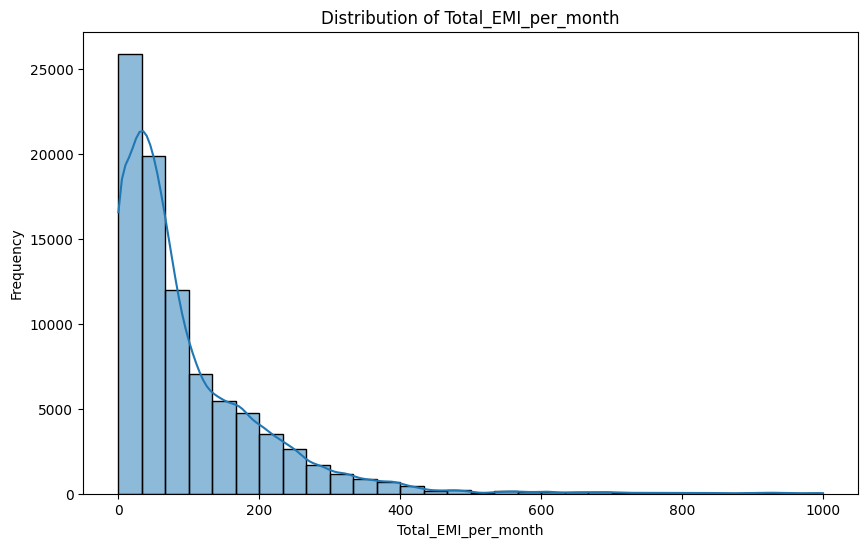

In [140]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df["Total_EMI_per_month"], bins=30, kde=True)
plt.xlabel("Total_EMI_per_month")
plt.ylabel("Frequency")
plt.title("Distribution of Total_EMI_per_month")
plt.show()

Amount Invested Monthly

In [141]:
check_column(train_df,"Amount_invested_monthly",0.25,0.75)

There's 3901 null values 
//////////////
Number of values greater than 531.9133513048695 in Amount_invested_monthly: 8591
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  79362
//////////////
Shape of column:  (87137,)


In [142]:
train_df["Amount_invested_monthly"] = train_df["Amount_invested_monthly"].apply(lambda x : x if (0 <= x <= 1500) else np.nan)

In [143]:
check_column(train_df,"Amount_invested_monthly",0.25,0.75)

There's 7654 null values 
//////////////
Number of values greater than 467.4435206834919 in Amount_invested_monthly: 6320
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  79352
//////////////
Shape of column:  (87137,)


In [144]:
train_df["Amount_invested_monthly"] = train_df.groupby("Customer_ID")["Amount_invested_monthly"].transform(lambda x : x.fillna(x.mean()))

In [145]:
check_column(train_df,"Amount_invested_monthly",0.25,0.75)

There's 13 null values 
//////////////
Number of values greater than 469.90368307359245 in Amount_invested_monthly: 6546
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  85021
//////////////
Shape of column:  (87137,)


In [146]:
train_df.dropna(subset=["Amount_invested_monthly"], inplace=True)

In [147]:
check_column(train_df,"Amount_invested_monthly",0.1,0.9)

There's 0 null values 
//////////////
Number of values greater than 956.1611983111486 in Amount_invested_monthly: 571
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  85021
//////////////
Shape of column:  (87124,)


In [148]:
train_df = remove(train_df,"Amount_invested_monthly",0.1,0.9)

In [149]:
check_column(train_df,"Amount_invested_monthly",0.1,0.9)

There's 0 null values 
//////////////
Number of values greater than 924.5372577604733 in Amount_invested_monthly: 126
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  84450
//////////////
Shape of column:  (86553,)


Payment Behaviour

In [150]:
train_df["Payment_Behaviour"] = train_df["Payment_Behaviour"].apply(lambda x : np.nan if (x == "!@9#%8") else x)

In [151]:
train_df["Payment_Behaviour"] = train_df.groupby("Customer_ID")["Payment_Behaviour"].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.isnull().all() and not x.mode().empty else x
)

In [152]:
train_df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      23922
High_spent_Medium_value_payments    17011
High_spent_Large_value_payments     13172
Low_spent_Medium_value_payments     12377
High_spent_Small_value_payments     10523
Low_spent_Large_value_payments       9542
Name: count, dtype: int64

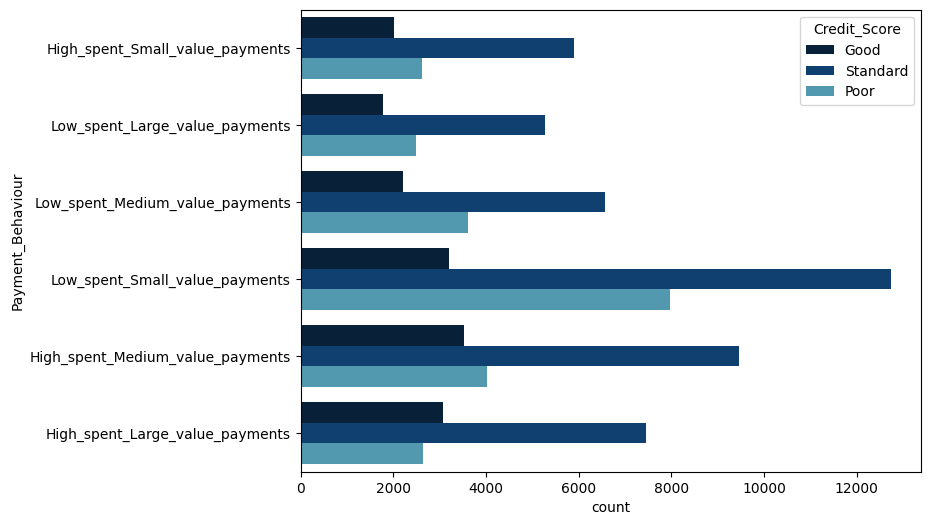

In [153]:
plt.figure(figsize=(8,6))
sns.countplot(y = train_df["Payment_Behaviour"],hue=train_df["Credit_Score"],palette="ocean")
plt.show()

Monthly_Balance

In [154]:
check_column(train_df,"Monthly_Balance",0.25,0.75)

There's 2115 null values 
//////////////
Number of values greater than 760.5225561527832 in Monthly_Balance: 5696
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  84430
//////////////
Shape of column:  (86553,)


In [155]:
train_df["Monthly_Balance"] = train_df.groupby("Customer_ID")["Monthly_Balance"].transform(lambda x : x.fillna(x.mean()))

In [156]:
check_column(train_df,"Monthly_Balance",0.1,0.9)

There's 1462 null values 
//////////////
Number of values greater than 1364.5980594068833 in Monthly_Balance: 9
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  84958
//////////////
Shape of column:  (86553,)


In [157]:
train_df.dropna(subset=["Monthly_Balance"], inplace=True)

In [158]:
check_column(train_df,"Monthly_Balance",0.15,0.85)

There's 0 null values 
//////////////
Number of values greater than 1102.2414622957465 in Monthly_Balance: 374
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  84958
//////////////
Shape of column:  (85091,)


In [159]:
train_df = remove(train_df,"Monthly_Balance",0.15,0.85)

In [160]:
train_df = remove(train_df,"Monthly_Balance",0.15,0.85)

In [161]:
check_column(train_df,"Monthly_Balance",0.15,0.85)

There's 0 null values 
//////////////
Number of values greater than 1084.1947543020328 in Monthly_Balance: 15
//////////////
Dtype of column:  float64
//////////////
Number of unique values:  84520
//////////////
Shape of column:  (84645,)


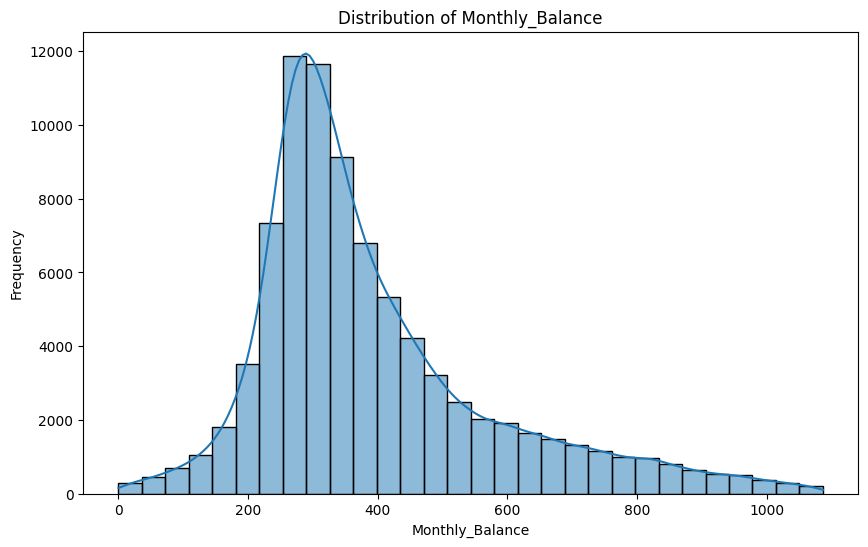

In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df["Monthly_Balance"], bins=30, kde=True)
plt.xlabel("Monthly_Balance")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly_Balance")
plt.show()

In [163]:
train_df.shape

(84645, 28)

In [164]:
drop_columns = ["ID","Customer_ID","Month","Name","SSN","Occupation","Type_of_Loan"]
train_df.drop(drop_columns,axis=1,inplace=True)

In [165]:
train_df.shape

(84645, 21)

In [166]:
#f,ax = plt.subplots(figsize=(15,15))
#sns.heatmap(train_df.corr(),annot=True,linewidths=0.5,fmt=".1f",ax=ax)
#plt.xticks(rotation=90)
#plt.yticks(rotation=0)
#plt.title("Correlation Map")
#plt.show()

In [167]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84645 entries, 0 to 98303
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       84645 non-null  float64
 1   Annual_Income             84645 non-null  float64
 2   Monthly_Inhand_Salary     84645 non-null  float64
 3   Num_Bank_Accounts         84645 non-null  float64
 4   Num_Credit_Card           84645 non-null  float64
 5   Interest_Rate             84645 non-null  float64
 6   Num_of_Loan               84645 non-null  float64
 7   Delay_from_due_date       84645 non-null  float64
 8   Num_of_Delayed_Payment    84645 non-null  float64
 9   Changed_Credit_Limit      84645 non-null  float64
 10  Num_Credit_Inquiries      84645 non-null  float64
 11  Credit_Mix                84645 non-null  object 
 12  Outstanding_Debt          84645 non-null  float64
 13  Credit_Utilization_Ratio  84645 non-null  float64
 14  Credit_Hist

In [168]:
train_df['Credit_Mix'] = train_df['Credit_Mix'].map({'Bad': -1,"Standart": 0,'Good': 1})

In [169]:
train_df['Credit_Mix'].fillna(0,inplace=True)

In [170]:
train_df['Credit_Mix'].value_counts()

Credit_Mix
 0.0    42270
 1.0    25895
-1.0    16480
Name: count, dtype: int64

In [171]:
train_df['Credit_Score'] = train_df['Credit_Score'].map({'Poor': -1,"Standard": 0,'Good': 1})

In [172]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84645 entries, 0 to 98303
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       84645 non-null  float64
 1   Annual_Income             84645 non-null  float64
 2   Monthly_Inhand_Salary     84645 non-null  float64
 3   Num_Bank_Accounts         84645 non-null  float64
 4   Num_Credit_Card           84645 non-null  float64
 5   Interest_Rate             84645 non-null  float64
 6   Num_of_Loan               84645 non-null  float64
 7   Delay_from_due_date       84645 non-null  float64
 8   Num_of_Delayed_Payment    84645 non-null  float64
 9   Changed_Credit_Limit      84645 non-null  float64
 10  Num_Credit_Inquiries      84645 non-null  float64
 11  Credit_Mix                84645 non-null  float64
 12  Outstanding_Debt          84645 non-null  float64
 13  Credit_Utilization_Ratio  84645 non-null  float64
 14  Credit_Hist

In [173]:
train_df["Payment_of_Min_Amount"].value_counts() / len(train_df) * 100

Payment_of_Min_Amount
Yes    58.167641
No     41.813456
Name: count, dtype: float64

In [174]:
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].map({'No': -1,'Yes': 1})

In [175]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84645 entries, 0 to 98303
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       84645 non-null  float64
 1   Annual_Income             84645 non-null  float64
 2   Monthly_Inhand_Salary     84645 non-null  float64
 3   Num_Bank_Accounts         84645 non-null  float64
 4   Num_Credit_Card           84645 non-null  float64
 5   Interest_Rate             84645 non-null  float64
 6   Num_of_Loan               84645 non-null  float64
 7   Delay_from_due_date       84645 non-null  float64
 8   Num_of_Delayed_Payment    84645 non-null  float64
 9   Changed_Credit_Limit      84645 non-null  float64
 10  Num_Credit_Inquiries      84645 non-null  float64
 11  Credit_Mix                84645 non-null  float64
 12  Outstanding_Debt          84645 non-null  float64
 13  Credit_Utilization_Ratio  84645 non-null  float64
 14  Credit_Hist

In [176]:
train_df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      23578
High_spent_Medium_value_payments    16613
High_spent_Large_value_payments     12611
Low_spent_Medium_value_payments     12133
High_spent_Small_value_payments     10338
Low_spent_Large_value_payments       9366
Name: count, dtype: int64

In [177]:
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].map({'Low_spent_Small_value_payments': 1,
                                                                   'Low_spent_Medium_value_payments': 2,
                                                                   "Low_spent_Large_value_payments" : 3,
                                                                   "High_spent_Medium_value_payments" : 5,
                                                                   "High_spent_Small_value_payments" : 4,
                                                                   "High_spent_Large_value_payments" : 6
                                                                   })

In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84645 entries, 0 to 98303
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       84645 non-null  float64
 1   Annual_Income             84645 non-null  float64
 2   Monthly_Inhand_Salary     84645 non-null  float64
 3   Num_Bank_Accounts         84645 non-null  float64
 4   Num_Credit_Card           84645 non-null  float64
 5   Interest_Rate             84645 non-null  float64
 6   Num_of_Loan               84645 non-null  float64
 7   Delay_from_due_date       84645 non-null  float64
 8   Num_of_Delayed_Payment    84645 non-null  float64
 9   Changed_Credit_Limit      84645 non-null  float64
 10  Num_Credit_Inquiries      84645 non-null  float64
 11  Credit_Mix                84645 non-null  float64
 12  Outstanding_Debt          84645 non-null  float64
 13  Credit_Utilization_Ratio  84645 non-null  float64
 14  Credit_Hist

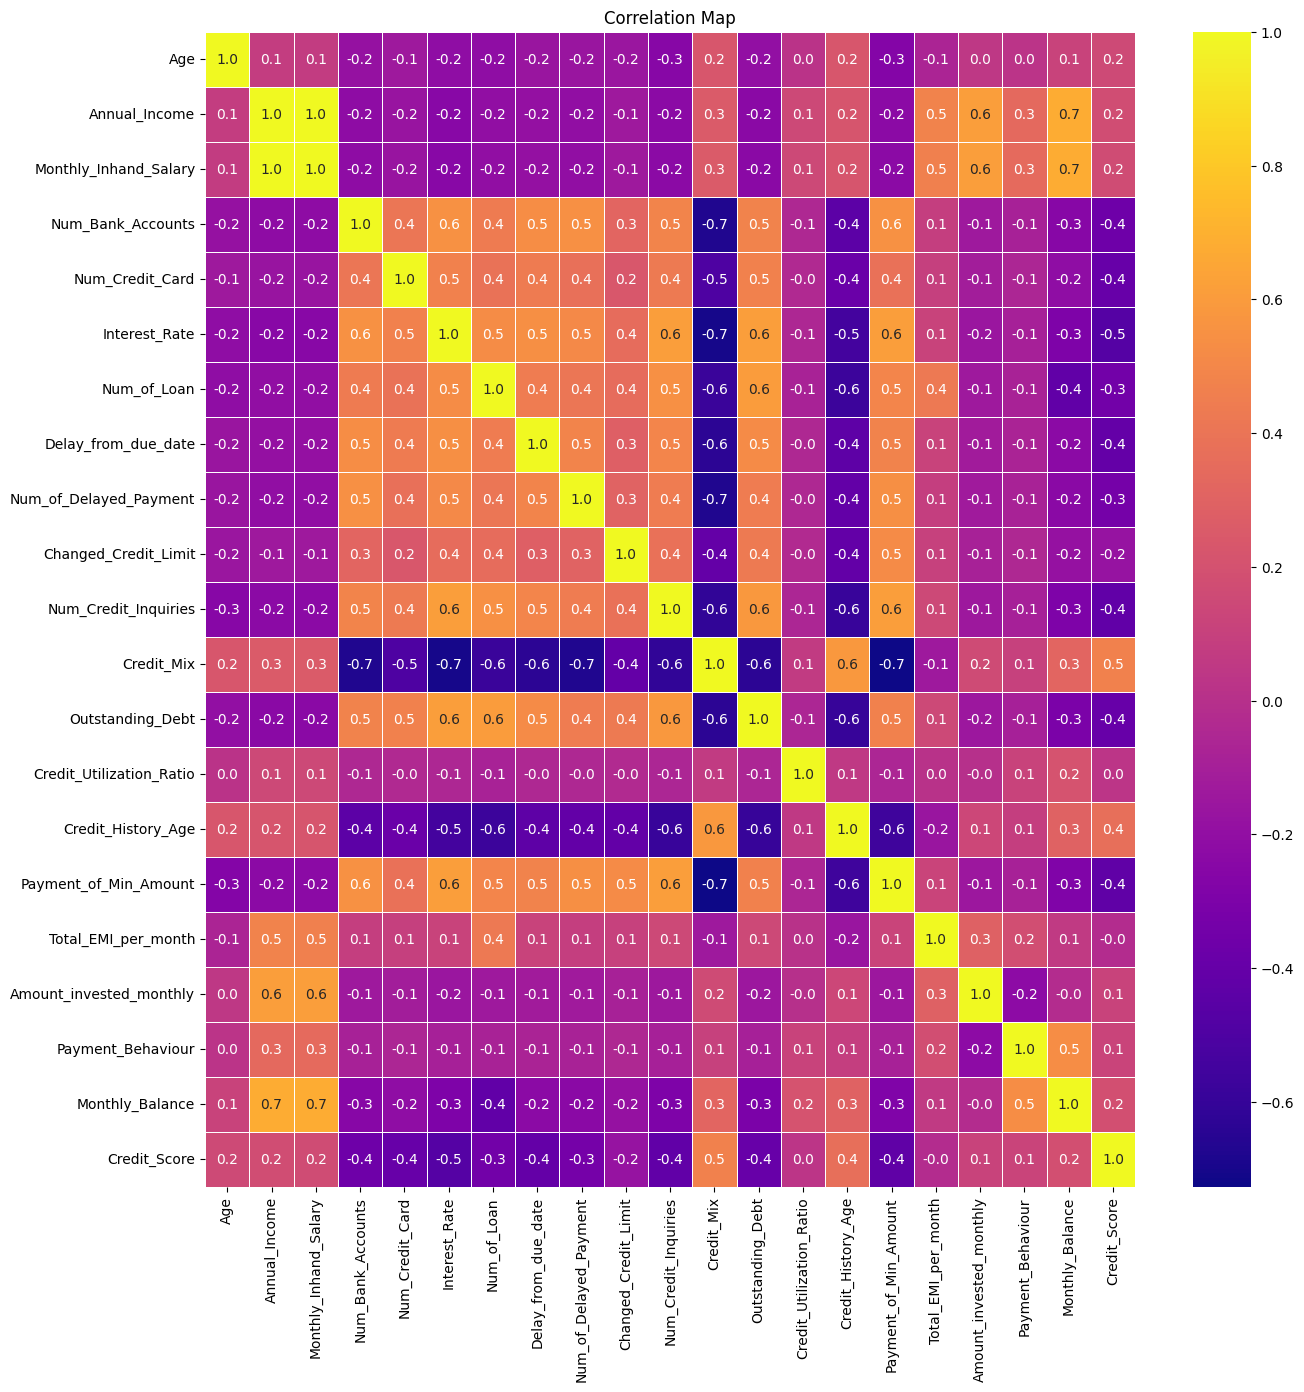

In [179]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_df.corr(),annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap="plasma")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

In [180]:
train_df.drop(["Monthly_Inhand_Salary"],axis=1,inplace=True)

In [181]:
train_df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,0.0,809.98,26.822620,265.0,-1.0,49.574949,80.415295,4.0,312.494089,1
1,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,10.0,11.27,4.0,1.0,809.98,31.944960,265.0,-1.0,49.574949,118.280222,3.0,284.629162,1
2,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,28.609352,267.0,-1.0,49.574949,81.699521,2.0,331.209863,1
3,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1.0,809.98,31.377862,268.0,-1.0,49.574949,199.458074,1.0,223.451310,1
4,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,10.0,11.27,4.0,1.0,809.98,24.797347,269.0,-1.0,49.574949,41.420153,5.0,341.489231,1


In [182]:
train_df.shape

(84645, 20)

Feature - Label 

In [183]:
X = train_df.drop("Credit_Score",axis=1)
y = train_df["Credit_Score"]

Train-Test Split

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [186]:
cols = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']


X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [187]:
X_train.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
85737,0.230220,-1.008281,1.079975,0.288990,0.598046,-1.016851,-0.996270,0.024956,0.255247,-0.145983,-0.158369,-0.237682,1.466220,0.566707,0.846662,-0.830756,-0.590090,-1.221446,-0.392665
64003,0.414778,0.407387,-0.890366,0.288990,-0.586478,-1.016851,0.423650,1.037161,-0.299453,0.383956,-0.158369,-0.917077,-1.183453,1.252801,-1.181109,-0.526132,-0.652921,1.470213,1.230669
6913,-1.246243,-0.817955,1.079975,1.283700,1.545665,1.535641,1.091847,2.049366,-1.007281,1.178864,-1.591841,2.352636,-1.220547,-2.013823,0.846662,-0.030140,-0.299604,-1.221446,-0.933483
15865,0.876173,-0.989857,-0.496298,-1.203075,-1.178741,-0.166020,-1.163319,-0.481147,-0.896341,-0.675922,1.275104,-0.899318,0.659509,0.290222,-1.181109,-0.702132,-0.579823,-1.221446,-0.452258
66849,-0.046617,-0.922448,1.079975,-0.705720,-0.586478,0.259395,-0.495122,-0.481147,-0.932279,-1.470831,1.275104,-0.496176,-1.295770,0.832953,-1.181109,-0.406343,-0.393338,-1.221446,-0.879417


In [188]:
RFC = RandomForestClassifier()

In [194]:
X_train.shape

(59251, 19)

In [195]:
y_train.shape

(59251,)

In [196]:
X_test.shape

(25394, 19)

In [197]:
y_test.shape

(25394,)

In [206]:
X_train.isnull().sum()

Age                          0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age           0
Payment_of_Min_Amount       15
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            5
Monthly_Balance              0
dtype: int64

In [207]:
X_test.isnull().sum()

Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       1
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           1
Monthly_Balance             0
dtype: int64

Hyperparameter Optimization & Model

In [210]:
mean_payment = X_train["Payment_of_Min_Amount"].mean()
X_train["Payment_of_Min_Amount"].fillna(mean_payment, inplace=True)

In [212]:
mean_payment1 = X_train["Payment_Behaviour"].mean()
X_train["Payment_Behaviour"].fillna(mean_payment1, inplace=True)

In [218]:
mean_payment2 = X_test["Payment_Behaviour"].mean()
X_test["Payment_Behaviour"].fillna(mean_payment2, inplace=True)

In [216]:
mean_payment3 = X_test["Payment_of_Min_Amount"].mean()
X_test["Payment_of_Min_Amount"].fillna(mean_payment3, inplace=True)

In [219]:
X_test.isnull().sum()

Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [230]:
from sklearn.metrics import classification_report
RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)


In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.79      0.82      0.80      6964
           0       0.83      0.82      0.82     13796
           1       0.76      0.75      0.75      4634

    accuracy                           0.81     25394
   macro avg       0.79      0.79      0.79     25394
weighted avg       0.81      0.81      0.81     25394



In [233]:
confusion_matrix(y_test, y_pred)

array([[ 5679,  1201,    84],
       [ 1467, 11305,  1024],
       [   32,  1140,  3462]], dtype=int64)